# Create Software Project - Take Home Midterm Exam/Assignment

* Objective: this jupyter notebook is intended to evaluate how the students understand the Duckietown repo

Prof. Nick Wang, 2016/11/7

## Instructions: 
1. $ cp assignment1.ipynb assignment1-XXXXXXX.ipynb (XXXXXXX is your name) You also need to add your name, setup, and state the contributions in the setup and contributions section.
2. You can already see the desired outputs of each cell, and you need to find the relevant code in the Duckietown repo and reproduce the results.
3. Each student needs to submit one to your mentor, via email. Please do not commit your ipynb to repo. Please do not modify assignment1.ipynb.


## Steup and Conributions:

This work is done by: PETER CHENG.

You need to state your contribution here. What's your working environment (e.g., VirtualBox XXX version on Window XX). If you get some help from your TA or classmates, you need to describe here.

# Line Detector

In [1]:
 %matplotlib inline

### 1.Load the image and resize

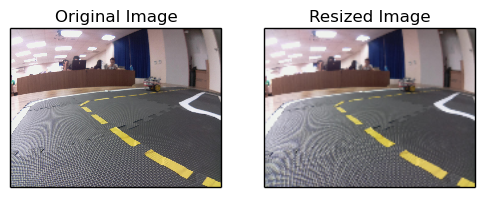

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Use your own image
img = cv2.imread("images/curve-right.jpg")

image_cv = cv2.resize(img, (160, 120),interpolation=cv2.INTER_NEAREST)

dst1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(dst1,cmap = 'brg')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

dst2 = cv2.cvtColor(image_cv,cv2.COLOR_BGR2RGB)
plt.subplot(122),plt.imshow(dst2,cmap = 'brg')
plt.title('Resized Image'), plt.xticks([]), plt.yticks([])

plt.show()


### 2.Find the edge (15%)

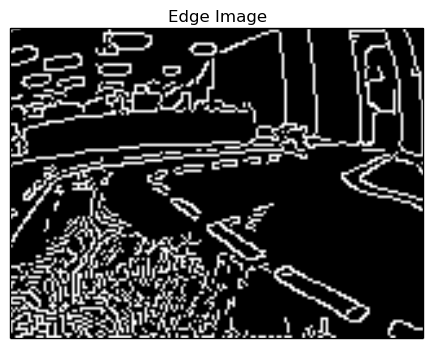

In [3]:


#You should find the config file 'universal.yaml'
#You code this
gray = cv2.cvtColor(image_cv, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 60, 150,apertureSize = 3)


plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

### 3-1.Setup HSV space threshold (15%)

In [4]:

#You should find the config file 'universal.yaml'
hsv_white1 = np.array([0,0,150])
hsv_white2 = np.array([180,100,255])
hsv_yellow1 = np.array([25, 50,50])
hsv_yellow2 = np.array([45, 255, 255])
hsv_red1 = np.array([0, 100, 100])
hsv_red2 = np.array([15, 255, 255])
hsv_red3 = np.array([165, 100, 100])
hsv_red4 = np.array([180, 255,255])
print cv2.COLOR_BGR2HSV

40


### 3-2.Threshold colors in HSV space (15%)

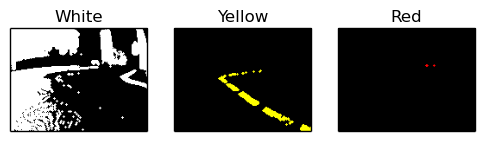

In [5]:
dilation_kernel_size = 3
#change color space to HSV
hsv = cv2.cvtColor(image_cv, cv2.COLOR_BGR2HSV)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(dilation_kernel_size, dilation_kernel_size))

#find the color
white =  cv2.inRange(hsv, hsv_white1, hsv_white2)
white = cv2.dilate(white, kernel)

yellow = cv2.inRange(hsv, hsv_yellow1, hsv_yellow2)
yellow = cv2.dilate(yellow, kernel)

red1 = cv2.inRange(hsv, hsv_red1, hsv_red2)
red2 = cv2.inRange(hsv, hsv_red3, hsv_red4)
red = cv2.bitwise_or(red1, red2)
red = cv2.dilate(red, kernel)


# Uncomment '#' to plot with color
x = cv2.cvtColor(yellow, cv2.COLOR_GRAY2BGR)
x[:,:,2] *= 1
x[:,:,1] *= 1
x[:,:,0] *= 0
x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)

y = cv2.cvtColor(red, cv2.COLOR_GRAY2BGR)
y[:,:,2] *= 1
y[:,:,1] *= 0
y[:,:,0] *= 0
y = cv2.cvtColor(y, cv2.COLOR_BGR2RGB)

plt.subplot(131),plt.imshow(white,cmap = 'gray')
plt.title('White'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(yellow,cmap = 'gray')
plt.subplot(132),plt.imshow(x,cmap = 'brg')
plt.title('Yellow'), plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(red,cmap = 'gray')
plt.subplot(133),plt.imshow(y,cmap = 'brg')
plt.title('Red'), plt.xticks([]), plt.yticks([])

plt.show()

### 4.Combine Edge and Colors (15%)

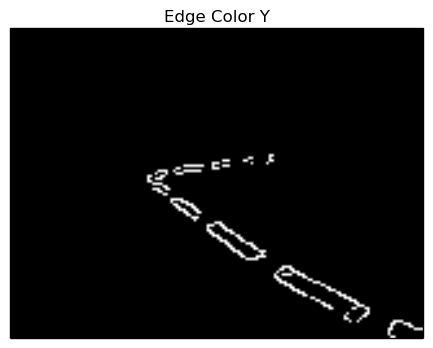

In [6]:

edge_color_white = cv2.bitwise_and(cv2.dilate(white, kernel), edges)
edge_color_yellow = cv2.bitwise_and(cv2.dilate(yellow, kernel), edges)
edge_color_red = cv2.bitwise_and(cv2.dilate(red, kernel), edges)


plt.imshow(edge_color_yellow,cmap = 'gray')
plt.title('Edge Color Y'), plt.xticks([]), plt.yticks([])
#plt.subplot(131),plt.imshow(edge_color_white,cmap = 'gray')
#plt.title('Edge Color W'), plt.xticks([]), plt.yticks([])
#plt.subplot(132),plt.imshow(edge_color_yellow,cmap = 'gray')
#plt.title('Edge Color Y'), plt.xticks([]), plt.yticks([])
#plt.subplot(133),plt.imshow(edge_color_red,cmap = 'gray')
#plt.title('Edge Color R'), plt.xticks([]), plt.yticks([])

plt.show()

### 5-1.Find the lines (15%)

In [7]:
hough_threshold = 20
hough_min_line_length = 3
hough_max_line_gap = 3
#default threshold 20-> 10
lines_white = cv2.HoughLinesP(edge_color_white, 1, np.pi/180, hough_threshold, np.empty(1), hough_min_line_length, hough_max_line_gap)
lines_yellow = cv2.HoughLinesP(edge_color_yellow, 1, np.pi/180, hough_threshold, np.empty(1), hough_min_line_length, hough_max_line_gap)
lines_red = cv2.HoughLinesP(edge_color_red, 1, np.pi/180, hough_threshold, np.empty(1), hough_min_line_length, hough_max_line_gap)


color = "yellow"
lines = lines_yellow
bw = yellow

if lines is not None:
    lines = np.array(lines[0])
    print "found lines"

else:
    lines = []
    print "no lines"


found lines


### Show the lines (yellow)

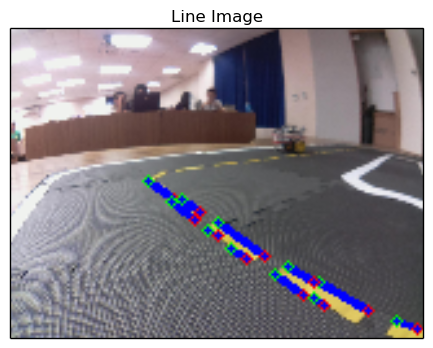

In [8]:
image_with_lines = np.copy(dst2)
if len(lines)>0:
    for x1,y1,x2,y2 in lines:
        cv2.line(image_with_lines, (x1,y1), (x2,y2), (0,0,255), 2)
        cv2.circle(image_with_lines, (x1,y1), 2, (0,255,0))
        cv2.circle(image_with_lines, (x2,y2), 2, (255,0,0))
        
plt.imshow(image_with_lines,cmap = 'brg')
plt.title('Line Image'), plt.xticks([]), plt.yticks([])
plt.show()

### 6-1.Normals (15%)

In [9]:
arr_cutoff = np.array((0, 40, 0, 40))
arr_ratio = np.array((1./160, 1./120, 1./160, 1./120))
        
normals = []
centers = []
if len(lines)>0:
    
    #find the normalized coordinates
    lines_normalized = ((lines + arr_cutoff) * arr_ratio)

    #find the dx dy
    length = np.sum((lines[:, 0:2] -lines[:, 2:4])**2, axis=1, keepdims=True)**0.5
    dx =  1.* (lines[:,3:4]-lines[:,1:2])/length
    dy = 1.* (lines[:,0:1]-lines[:,2:3])/length

    #find the center point
    centers = np.hstack([(lines[:,0:1]+lines[:,2:3])/2, (lines[:,1:2]+lines[:,3:4])/2])

    #find the vectors' direction
    x3 = (centers[:,0:1] - 3.*dx).astype('int')
    x3[x3<0]=0
    x3[x3>=160]=160-1

    y3 = (centers[:,1:2] - 3.*dy).astype('int')
    y3[y3<0]=0
    y3[y3>=120]=120-1

    x4 = (centers[:,0:1] + 3.*dx).astype('int')
    x4[x4<0]=0
    x4[x4>=160]=160-1

    y4 = (centers[:,1:2] + 3.*dy).astype('int')
    y4[y4<0]=0
    y4[y4>=120]=120-1
    

    #find the dx dy direction
    flag_signs = (np.logical_and(bw[y3,x3]>0, bw[y4,x4]==0)).astype('int')*2-1
    normals = np.hstack([dx, dy]) * flag_signs

    
    flag = ((lines[:,2]-lines[:,0])*normals[:,1] - (lines[:,3]-lines[:,1])*normals[:,0])>0
    for i in range(len(lines)):
        if flag[i]:
            x1,y1,x2,y2 = lines[i, :]
            lines[i, :] = [x2,y2,x1,y1]

### 6-2.Draw the Normals 

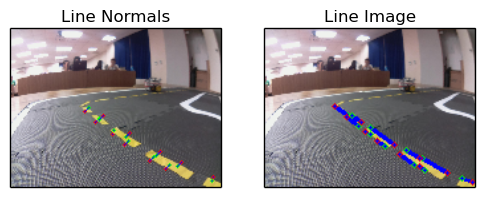

In [10]:
image_with_lines = np.copy(dst2)
if len(centers)>0:
    for x,y,dx,dy in np.hstack((centers,normals)):
        x3 = int(x - 2.*dx)
        y3 = int(y - 2.*dy)
        x4 = int(x + 2.*dx)
        y4 = int(y + 2.*dy)
        cv2.line(image_with_lines, (x3,y3), (x4,y4), (0,0,255), 1)
        cv2.circle(image_with_lines, (x3,y3), 1, (0,255,0))
        cv2.circle(image_with_lines, (x4,y4), 1, (255,0,0))
            
plt.subplot(121),plt.imshow(image_with_lines,cmap = 'brg')
plt.title('Line Normals'), plt.xticks([]), plt.yticks([])

image_with_lines = np.copy(dst2)
if len(lines)>0:
    for x1,y1,x2,y2 in lines:
        cv2.line(image_with_lines, (x1,y1), (x2,y2), (0,0,255), 2)
        cv2.circle(image_with_lines, (x1,y1), 2, (0,255,0))
        cv2.circle(image_with_lines, (x2,y2), 2, (255,0,0))
        
plt.subplot(122),plt.imshow(image_with_lines,cmap = 'brg')
plt.title('Line Image'), plt.xticks([]), plt.yticks([])
plt.show()

### 7-1.setup the segment class

In [11]:
class Vector2D():
    def __init__(self):
        self.x = 0
        self.y = 0  
class Segment():
    def __init__(self):
        self.color = ""
        self.pixels_normalized = np.array([Vector2D(),Vector2D()])
        self.normal = Vector2D()
        

### 7-2.Store in the SegmentList 

In [12]:
segmentMsgList = []

for x1,y1,x2,y2,norm_x,norm_y in np.hstack((lines_normalized,normals)):
    segment = Segment()
    segment.color = color
    segment.pixels_normalized[0].x = x1
    segment.pixels_normalized[0].y = y1
    segment.pixels_normalized[1].x = x2
    segment.pixels_normalized[1].y = y2
    segment.normal.x = norm_x
    segment.normal.y = norm_y

    segmentMsgList.append(segment)  
    
print segmentMsgList[2].pixels_normalized[1].x

0.98125


### 7.3 Print the SegmentList

In [13]:
for i in segmentMsgList:
    print (i.pixels_normalized[0].x,i.pixels_normalized[0].y),(i.pixels_normalized[1].x,i.pixels_normalized[1].y)

(0.5, 0.95833333333333337) (0.61250000000000004, 1.0666666666666667)
(0.47500000000000003, 0.98333333333333328) (0.5, 1.0)
(0.93125000000000002, 1.2749999999999999) (0.98125000000000007, 1.3)
(0.33125000000000004, 0.82499999999999996) (0.39375000000000004, 0.8833333333333333)
(0.38750000000000001, 0.89166666666666661) (0.44375000000000003, 0.94999999999999996)
(0.73125000000000007, 1.2) (0.75625000000000009, 1.2250000000000001)
(0.74375000000000002, 1.1499999999999999) (0.86250000000000004, 1.2416666666666667)
(0.66875000000000007, 1.1000000000000001) (0.73125000000000007, 1.1499999999999999)
(0.53125, 1.0416666666666667) (0.56874999999999998, 1.075)
(0.63750000000000007, 1.125) (0.70625000000000004, 1.1916666666666667)
(0.41250000000000003, 0.8833333333333333) (0.45625000000000004, 0.92499999999999993)


# Ground Projection 

In [14]:
lines_normalized, normals


print lines_normalized[0,1],normals[0]


0.958333333333 [ 0.58549055 -0.81067923]


### camera parameters


In [15]:
import cv2
import numpy as np
#camera_matrix = np.array([[1.3e+03, 0., 6.0e+02], [0., 1.3e+03, 4.8e+02], [0., 0., 1.]], dtype=np.float32)
#dist_coeffs = np.array([-2.4-01, 9.5e-02, -4.0e-04, 8.9e-05, 0.], dtype=np.float32)

#Use your own homography & intrinsic camera_matrix and dist_coeffs
homography = np.array([[4.7735e-05, -0.0002136365, -0.2214576], [0.001002189, -3.369404e-05, -0.3031031], [-4.332491e-05, -0.006859886, 1]]
)
matrix = np.array([[397.2313423887745, 0.0, 321.36163202144127], [0.0, 398.5399144224602, 246.47954600504573],
    [0.0, 0.0, 1.0]])
coeffs = np.array([-0.3929879882933439, 0.11340416624167338, -0.006579341864704046, -7.794987161672481e-06,
    0.0])

In [16]:
pt_img = np.array([[0.5*640],[0.7*480],[1.]])
#print pt_img
G = np.dot(homography,pt_img)
G/=G[2]
print G

pt_img = np.array([[[0.5*640,0.7*480]]])

xy_undistorted = cv2.undistortPoints(pt_img, matrix, coeffs,R=None, P=matrix)
pt_img = np.array([[xy_undistorted[0][0][0]],[xy_undistorted[0][0][1]],[1.]])
#print xy_undistorted
G_rect = np.dot(homography,pt_img)
G_rect/=G_rect[2]
print G_rect

[[ 0.21077289]
 [-0.00475906]
 [ 1.        ]]
[[ 0.20864665]
 [-0.00461996]
 [ 1.        ]]


### Rectify the image (15%) 

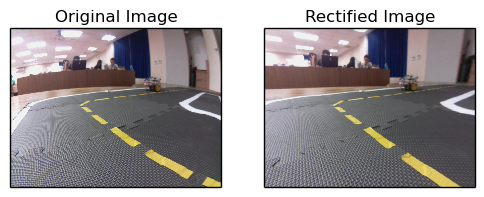

In [17]:
from matplotlib import pyplot as plt
#Use your own image
origin = cv2.imread("images/curve-right.jpg")


#rectfy the image by opencv 'undistort'
origin = cv2.resize(origin, (640, 480),interpolation=cv2.INTER_NEAREST)
rec_img = cv2.undistort(origin, matrix, coeffs)


origin = cv2.cvtColor(origin,cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(origin,cmap = 'brg')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

rec_img = cv2.cvtColor(rec_img,cv2.COLOR_BGR2RGB)
plt.subplot(122),plt.imshow(rec_img,cmap = 'brg')
plt.title('Rectified Image'), plt.xticks([]), plt.yticks([])

plt.show()

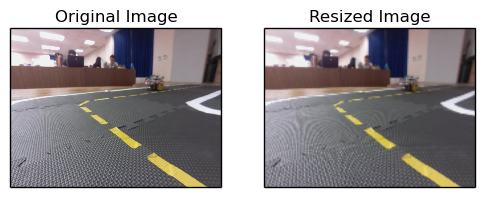

In [18]:
img = rec_img
image_cv = cv2.resize(img, (160, 120),interpolation=cv2.INTER_NEAREST)

dst1 = img#cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(dst1,cmap = 'brg')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

dst2 = image_cv#cv2.cvtColor(image_cv,cv2.COLOR_BGR2RGB)
plt.subplot(122),plt.imshow(dst2,cmap = 'brg')
plt.title('Resized Image'), plt.xticks([]), plt.yticks([])

plt.show()



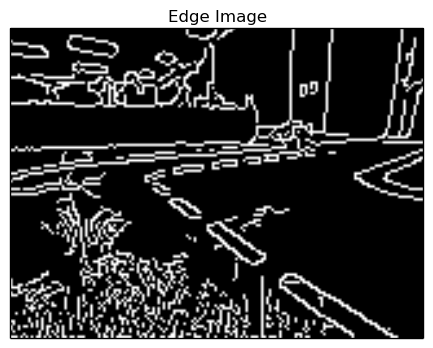

In [19]:
gray = cv2.cvtColor(image_cv, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray, 60, 150,apertureSize = 3)


plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

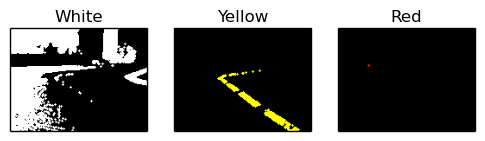

In [20]:
#You should find the config file 'universal.yaml'
hsv_white1 = np.array([0,0,150])
hsv_white2 = np.array([180,100,255])
hsv_yellow1 = np.array([25, 50,50])
hsv_yellow2 = np.array([45, 255, 255])
hsv_red1 = np.array([0, 100, 100])
hsv_red2 = np.array([15, 255, 255])
hsv_red3 = np.array([165, 100, 100])
hsv_red4 = np.array([180, 255,255])
image_cv = cv2.cvtColor(image_cv, cv2.COLOR_RGB2BGR)
dilation_kernel_size = 3
#change color space to HSV
hsv = cv2.cvtColor(image_cv, cv2.COLOR_BGR2HSV)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(dilation_kernel_size, dilation_kernel_size))

#find the color
white =  cv2.inRange(hsv, hsv_white1, hsv_white2)
white = cv2.dilate(white, kernel)

yellow = cv2.inRange(hsv, hsv_yellow1, hsv_yellow2)
yellow = cv2.dilate(yellow, kernel)

red1 = cv2.inRange(hsv, hsv_red1, hsv_red2)
red2 = cv2.inRange(hsv, hsv_red3, hsv_red4)
red = cv2.bitwise_or(red1, red2)
red = cv2.dilate(red, kernel)


# Uncomment '#' to plot with color
x = cv2.cvtColor(yellow, cv2.COLOR_GRAY2BGR)
x[:,:,2] *= 1
x[:,:,1] *= 1
x[:,:,0] *= 0
x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)

y = cv2.cvtColor(red, cv2.COLOR_GRAY2BGR)
y[:,:,2] *= 1
y[:,:,1] *= 0
y[:,:,0] *= 0
y = cv2.cvtColor(y, cv2.COLOR_BGR2RGB)

plt.subplot(131),plt.imshow(white,cmap = 'gray')
plt.title('White'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(yellow,cmap = 'gray')
plt.subplot(132),plt.imshow(x,cmap = 'brg')
plt.title('Yellow'), plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(red,cmap = 'gray')
plt.subplot(133),plt.imshow(y,cmap = 'brg')
plt.title('Red'), plt.xticks([]), plt.yticks([])

plt.show()

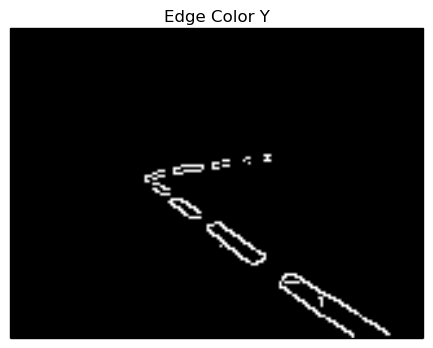

In [21]:

edge_color_white = cv2.bitwise_and(cv2.dilate(white, kernel), edges)
edge_color_yellow = cv2.bitwise_and(cv2.dilate(yellow, kernel), edges)
edge_color_red = cv2.bitwise_and(cv2.dilate(red, kernel), edges)


plt.imshow(edge_color_yellow,cmap = 'gray')
plt.title('Edge Color Y'), plt.xticks([]), plt.yticks([])
#plt.subplot(131),plt.imshow(edge_color_white,cmap = 'gray')
#plt.title('Edge Color W'), plt.xticks([]), plt.yticks([])
#plt.subplot(132),plt.imshow(edge_color_yellow,cmap = 'gray')
#plt.title('Edge Color Y'), plt.xticks([]), plt.yticks([])
#plt.subplot(133),plt.imshow(edge_color_red,cmap = 'gray')
#plt.title('Edge Color R'), plt.xticks([]), plt.yticks([])

plt.show()

In [22]:
hough_threshold = 20
hough_min_line_length = 3
hough_max_line_gap = 3
#default threshold 20-> 10
lines_white = cv2.HoughLinesP(edge_color_white, 1, np.pi/180, hough_threshold, np.empty(1), hough_min_line_length, hough_max_line_gap)
lines_yellow = cv2.HoughLinesP(edge_color_yellow, 1, np.pi/180, hough_threshold, np.empty(1), hough_min_line_length, hough_max_line_gap)
lines_red = cv2.HoughLinesP(edge_color_red, 1, np.pi/180, hough_threshold, np.empty(1), hough_min_line_length, hough_max_line_gap)


color = "yellow"
lines = lines_yellow
bw = yellow

if lines is not None:
    lines = np.array(lines[0])
    print "found lines"

else:
    lines = []
    print "no lines"



found lines


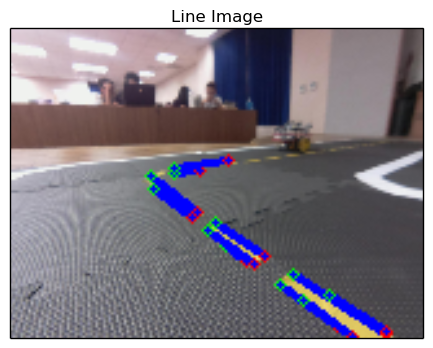

In [23]:
image_with_lines = np.copy(dst2)
if len(lines)>0:
    for x1,y1,x2,y2 in lines:
        cv2.line(image_with_lines, (x1,y1), (x2,y2), (0,0,255), 2)
        cv2.circle(image_with_lines, (x1,y1), 2, (0,255,0))
        cv2.circle(image_with_lines, (x2,y2), 2, (255,0,0))
        
plt.imshow(image_with_lines,cmap = 'brg')
plt.title('Line Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [24]:
arr_cutoff = np.array((0, 40, 0, 40))
arr_ratio = np.array((1./160, 1./120, 1./160, 1./120))
        
normals = []
centers = []
if len(lines)>0:
    
    #find the normalized coordinates
    lines_normalized = ((lines + arr_cutoff) * arr_ratio)

    #find the dx dy
    length = np.sum((lines[:, 0:2] -lines[:, 2:4])**2, axis=1, keepdims=True)**0.5
    dx =  1.* (lines[:,3:4]-lines[:,1:2])/length
    dy = 1.* (lines[:,0:1]-lines[:,2:3])/length

    #find the center point
    centers = np.hstack([(lines[:,0:1]+lines[:,2:3])/2, (lines[:,1:2]+lines[:,3:4])/2])

    #find the vectors' direction
    x3 = (centers[:,0:1] - 3.*dx).astype('int')
    x3[x3<0]=0
    x3[x3>=160]=160-1

    y3 = (centers[:,1:2] - 3.*dy).astype('int')
    y3[y3<0]=0
    y3[y3>=120]=120-1

    x4 = (centers[:,0:1] + 3.*dx).astype('int')
    x4[x4<0]=0
    x4[x4>=160]=160-1

    y4 = (centers[:,1:2] + 3.*dy).astype('int')
    y4[y4<0]=0
    y4[y4>=120]=120-1
    

    #find the dx dy direction
    flag_signs = (np.logical_and(bw[y3,x3]>0, bw[y4,x4]==0)).astype('int')*2-1
    normals = np.hstack([dx, dy]) * flag_signs

    
    flag = ((lines[:,2]-lines[:,0])*normals[:,1] - (lines[:,3]-lines[:,1])*normals[:,0])>0
    for i in range(len(lines)):
        if flag[i]:
            x1,y1,x2,y2 = lines[i, :]
            lines[i, :] = [x2,y2,x1,y1]

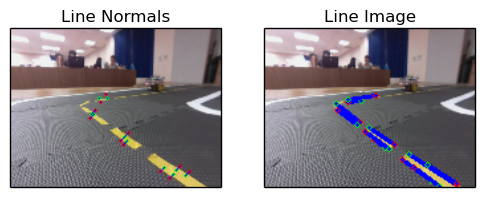

In [25]:
image_with_lines = np.copy(dst2)
if len(centers)>0:
    for x,y,dx,dy in np.hstack((centers,normals)):
        x3 = int(x - 2.*dx)
        y3 = int(y - 2.*dy)
        x4 = int(x + 2.*dx)
        y4 = int(y + 2.*dy)
        cv2.line(image_with_lines, (x3,y3), (x4,y4), (0,0,255), 1)
        cv2.circle(image_with_lines, (x3,y3), 1, (0,255,0))
        cv2.circle(image_with_lines, (x4,y4), 1, (255,0,0))
            
plt.subplot(121),plt.imshow(image_with_lines,cmap = 'brg')
plt.title('Line Normals'), plt.xticks([]), plt.yticks([])

image_with_lines = np.copy(dst2)
if len(lines)>0:
    for x1,y1,x2,y2 in lines:
        cv2.line(image_with_lines, (x1,y1), (x2,y2), (0,0,255), 2)
        cv2.circle(image_with_lines, (x1,y1), 2, (0,255,0))
        cv2.circle(image_with_lines, (x2,y2), 2, (255,0,0))
        
plt.subplot(122),plt.imshow(image_with_lines,cmap = 'brg')
plt.title('Line Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [26]:
class Vector2D():
    def __init__(self):
        self.x = 0
        self.y = 0  
class Segment():
    def __init__(self):
        self.color = ""
        self.pixels_normalized = np.array([Vector2D(),Vector2D()])
        self.normal = Vector2D()
        
segmentMsgList = []

for x1,y1,x2,y2,norm_x,norm_y in np.hstack((lines_normalized,normals)):
    segment = Segment()
    segment.color = color
    segment.pixels_normalized[0].x = x1
    segment.pixels_normalized[0].y = y1
    segment.pixels_normalized[1].x = x2
    segment.pixels_normalized[1].y = y2
    segment.normal.x = norm_x
    segment.normal.y = norm_y

    segmentMsgList.append(segment)  
    
print segmentMsgList[2].pixels_normalized[1].x

0.6125


In [27]:
for i in segmentMsgList:
    print (i.pixels_normalized[0].x,i.pixels_normalized[0].y),(i.pixels_normalized[1].x,i.pixels_normalized[1].y)

(0.68125000000000002, 1.125) (0.90625, 1.3166666666666667)
(0.51875000000000004, 1.0333333333333332) (0.56874999999999998, 1.0833333333333333)
(0.49375000000000002, 0.95833333333333337) (0.61250000000000004, 1.0666666666666667)
(0.65000000000000002, 1.1583333333333332) (0.78750000000000009, 1.2916666666666667)
(0.76875000000000004, 1.1916666666666667) (0.90625, 1.3083333333333333)
(0.47500000000000003, 0.98333333333333328) (0.58750000000000002, 1.0916666666666666)
(0.33750000000000002, 0.80833333333333335) (0.45000000000000001, 0.92499999999999993)
(0.34375, 0.84999999999999998) (0.4375, 0.94166666666666665)
(0.70625000000000004, 1.2083333333333333) (0.82500000000000007, 1.325)
(0.39375000000000004, 0.80000000000000004) (0.45625000000000004, 0.79166666666666663)
(0.39375000000000004, 0.78333333333333333) (0.52500000000000002, 0.7583333333333333)


# Duckietown Lane Filter

up/down arrow keys to move, enter to edit

Esc to exit edit mode

Shift + enter to run code

1/2/3... to add comment

dd to delete cell

press h for more shortcuts

In [28]:
import numpy as np
from scipy.stats import multivariate_normal, entropy
from scipy.ndimage.filters import gaussian_filter
from math import floor, atan2, pi, cos, sin, sqrt
import time
from matplotlib import pyplot as plt

## Environment Setup

In [29]:
# constant
WHITE = 0
YELLOW = 1
RED = 2

lanewidth = 0.4
linewidth_white = 0.04
linewidth_yellow = 0.02



## Generate Vote (Extra Credit 10% for generating multiple votes from all detected segments)

#### Setup a line segment
* left edge of white lane
* right edge of white lane
* left edge of yellow lane
* right edge of white lane

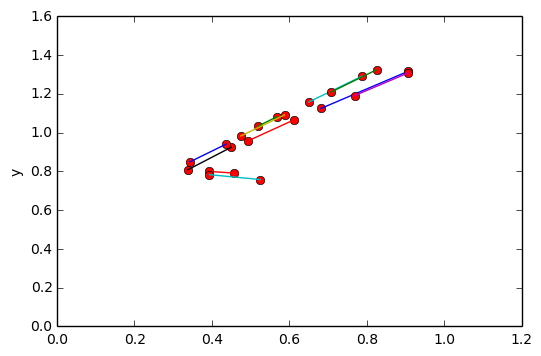

In [53]:
#print lines_normalized
# right edge of white lane
#p1 = np.array([0.8, 0.24])
#p2 = np.array([0.4, 0.24])
for line in lines_normalized:
    p1 = np.array([line[0],line[1]])
    p2 = np.array([line[2],line[3]]) 
    seg_color = YELLOW

# left edge of white lane
#p1 = np.array([0.4, 0.2])
#p2 = np.array([0.8, 0.2])
#seg_color = WHITE

    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'ro')
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]])
    plt.ylabel('y')
    plt.axis([0, 1.2, 0, 1.6])
plt.show()

#### compute d_i, phi_i, l_i

In [54]:
d_phi_l = []
for line in lines_normalized:
    p1 = np.array([line[0],line[1]])
    p2 = np.array([line[2],line[3]]) 
    seg_color = YELLOW


    t_hat = (p2-p1)/np.linalg.norm(p2-p1)
    n_hat = np.array([-t_hat[1],t_hat[0]])
    d1 = np.inner(n_hat,p1)
    d2 = np.inner(n_hat,p2)
    l1 = np.inner(t_hat,p1)
    l2 = np.inner(t_hat,p2)

    print (d1, d2, l1, l2)

    if (l1 < 0):
        l1 = -l1;
    if (l2 < 0):
        l2 = -l2;
    l_i = (l1+l2)/2
    d_i = (d1+d2)/2
    phi_i = np.arcsin(t_hat[1])
    if seg_color == WHITE: # right lane is white
        if(p1[0] > p2[0]): # right edge of white lane
            d_i = d_i - linewidth_white
            print ('right edge of white lane')
        else: # left edge of white lane
            d_i = - d_i
            phi_i = -phi_i
            print ('left edge of white lane')
        d_i = d_i - lanewidth/2

    elif seg_color == YELLOW: # left lane is yellow
        if (p2[0] > p1[0]): # left edge of yellow lane
            d_i = d_i - linewidth_yellow
            phi_i = -phi_i
            print ('left edge of yellow lane')
        else: # right edge of white lane
            d_i = -d_i
            print ('right edge of yellow lane')
        d_i =  lanewidth/2 - d_i

    d_phi_l.append((d_i, phi_i, l_i))
    print (d_i, phi_i, l_i) 

(0.41463086142019245, 0.41463086142019256, 1.2481217133188371, 1.543690844168307)
left edge of yellow lane
(-0.19463086142019248, -0.70556817768521107, 1.3959062787435721)
(0.36386536448557621, 0.36386536448557616, 1.097488649966621, 1.1681993280852758)
left edge of yellow lane
(-0.14386536448557613, -0.7853981633974495, 1.1328439890259485)
(0.37521537574554154, 0.37521537574554148, 1.0106459627792068, 1.1713869768705429)
left edge of yellow lane
(-0.15521537574554151, -0.73955873751633117, 1.0910164698248748)
(0.37907316229953353, 0.37907316229953358, 1.2730041825286129, 1.4645349314379665)
left edge of yellow lane
(-0.15907316229953355, -0.77001476161685356, 1.3687695569832896)
(0.4112928063525963, 0.41129280635259624, 1.3571603569169894, 1.5374860653201758)
left edge of yellow lane
(-0.19129280635259621, -0.70361378277945252, 1.4473232111185825)
(0.378835075243668, 0.37883507524366805, 1.0242330936898929, 1.180413633806487)
left edge of yellow lane
(-0.15883507524366797, -0.76653247

### Measurement Likelihood

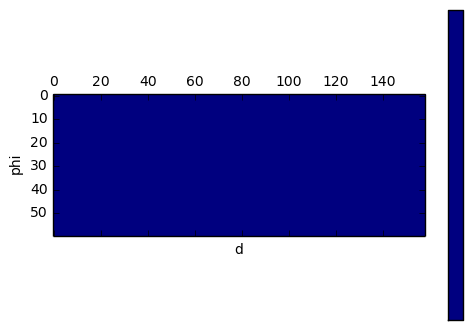

In [55]:
# initialize measurement likelihood

d_min = -0.7
d_max = 0.5
delta_d = 0.02
phi_min = -pi/2
phi_max = pi/2
delta_phi = 0.02
d, phi = np.mgrid[d_min:d_max:delta_d, phi_min:phi_max:delta_phi]

measurement_likelihood = np.zeros(d.shape)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(measurement_likelihood, interpolation='nearest')
fig.colorbar(cax)
plt.ylabel('phi')
plt.xlabel('d')
#ax.set_xticklabels(['']+alpha)
#ax.set_yticklabels(['']+alpha)
plt.show()



/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(25.0, 43.0)
(27.0, 39.0)
(27.0, 41.0)
(27.0, 40.0)
(25.0, 43.0)
(27.0, 40.0)
(30.0, 38.0)
(27.0, 39.0)
(27.0, 39.0)
(3.0, 85.0)
(3.0, 87.0)


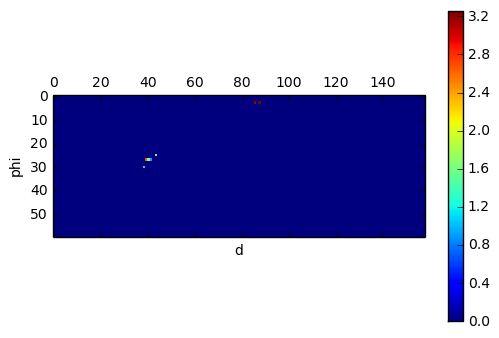

In [56]:
for d_i, phi_i, l_i in d_phi_l:
    i = floor((d_i - d_min)/delta_d)
    j = floor((phi_i - phi_min)/delta_phi)
    measurement_likelihood[i,j] = measurement_likelihood[i,j] +  1/(l_i)

    print (i, j)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(measurement_likelihood, interpolation='nearest')
fig.colorbar(cax)
plt.ylabel('phi')
plt.xlabel('d')
#ax.set_xticklabels(['']+alpha)
#ax.set_yticklabels(['']+alpha)
plt.show()

## Bayes' Filter (Extra Credit 10% for integrating Bayes' filter for multiple votes)

(60, 158)
(60, 158, 2)
[[-0.7  -0.7  -0.7  ..., -0.7  -0.7  -0.7 ]
 [-0.68 -0.68 -0.68 ..., -0.68 -0.68 -0.68]
 [-0.66 -0.66 -0.66 ..., -0.66 -0.66 -0.66]
 ..., 
 [ 0.44  0.44  0.44 ...,  0.44  0.44  0.44]
 [ 0.46  0.46  0.46 ...,  0.46  0.46  0.46]
 [ 0.48  0.48  0.48 ...,  0.48  0.48  0.48]]
[[-1.57079633 -1.55079633 -1.53079633 ...,  1.52920367  1.54920367
   1.56920367]
 [-1.57079633 -1.55079633 -1.53079633 ...,  1.52920367  1.54920367
   1.56920367]
 [-1.57079633 -1.55079633 -1.53079633 ...,  1.52920367  1.54920367
   1.56920367]
 ..., 
 [-1.57079633 -1.55079633 -1.53079633 ...,  1.52920367  1.54920367
   1.56920367]
 [-1.57079633 -1.55079633 -1.53079633 ...,  1.52920367  1.54920367
   1.56920367]
 [-1.57079633 -1.55079633 -1.53079633 ...,  1.52920367  1.54920367
   1.56920367]]


<matplotlib.contour.QuadContourSet instance at 0x7f2342c763b0>

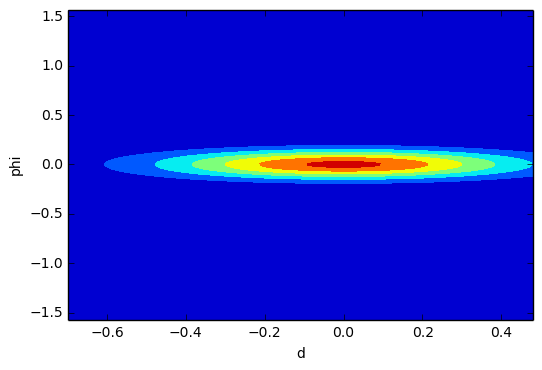

In [57]:
print d.shape
beliefRV = np.empty(d.shape)
pos = np.empty(d.shape + (2,))
pos[:,:,0]= d
pos[:,:,1]= phi

print pos.shape
print d
print phi
mean_0 = [0, 0]
cov_0 = [[0.1, 0], [0, 0.01]]

RV = multivariate_normal(mean_0, cov_0)
beliefRV=RV.pdf(pos)

plt.ylabel('phi')
plt.xlabel('d')
plt.contourf(d, phi, beliefRV)

<matplotlib.contour.QuadContourSet instance at 0x7f2342bd5248>

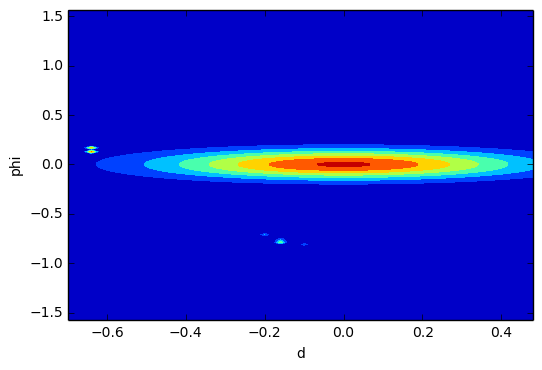

In [59]:
beliefRV=np.multiply(beliefRV+1,measurement_likelihood+1)-1
beliefRV=beliefRV/np.sum(beliefRV)

plt.ylabel('phi')
plt.xlabel('d')
plt.contourf(d, phi, beliefRV)

In [60]:
maxids = np.unravel_index(beliefRV.argmax(),beliefRV.shape)
print maxids
lanePose_d = d_min + maxids[0] * delta_d
lanePose_phi = phi_min + maxids[1] * delta_phi

print lanePose_d
print lanePose_phi

(35, 79)
1.11022302463e-16
0.0092036732051
